# Car sales ads analysis

# Table of contents:

1. [Introduction](#introduction)
2. [General information](#general)
    * [Conclusion](#conclusion1)
3. [Data preprocessing](#preprocess)
    * [Missing values](#missing)
    * [Data types replacement](#replacement)
    * [Conclusion](#conclusion2)
4. [Calculations](#calculations)
    * [Conclusion](#conclusion3)
5. [EDA](#eda)
    * [Univariate analysis](#univariate)
    * [Bi-variate analysis](#bivariate)
    * [Conclusion](#conclusion4)
6. [Overall conclusion](#conclusion5)

<a id="introduction"></a> 
# Introduction

Hundreds of free advertisements for vehicles are published on the site of Crankshaft List every day. The goal of this project is to find out which features of a vehicle influence its price the most by analyzing the data from ads published on our site in 2018-2019 years. 

<b>Project structure:</b>
1. General information. Taking a look at the data and determining first anomalities in data for the next step.
2. Data preprocessing. Further look into the data and preprocessing found anomalities (missing values, duplicates, mismatches etc). Additionally we'll make calculations needed for the analysis.
3. Exploratory Data Analysis. We'll check our features of interest from statistical point of view to determine whether the data is suitable for analysis, identifying outlierts etc, while studying the data in detail.
4. Overall conclusion and advice for business.

<b>Dataset</b>

https://drive.google.com/file/d/1A1PXPP7LucDnxoqhkaqNfcPKZFFjxqyk/view?usp=sharing

<a id="general"></a>
## General information

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    print('Error while reading the file') 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

*Conclusion*: In this dataset we have 51525 entries and 13 columns, having 6 numeric types and 7 object types. Already we can point out missing values in `model_year`, `cylinders`, `odometer`, `paint_color`, and the most missing data is in `is_4wd`, about half the total. Every column has its own number of missing values which probably means that values are missing from different rows and for various reasons, still all of these columns describe different properties of a car and probably weren't filled in in the advertisement itself. `date_posted` column is an object type so we'll have to convert it to dateTime object at a later stage. 

In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


`describe()` method shows us several other issues:

- there's an odd min value of 1 in `price` column. This value is too small to be a typo (10 is still too small), it can probably mean giving away for free, an attempt to attract attention to the advertisement, or intent to hide the actual price. It can also be an error. It is better to check how many values like this are in the set. Also, values of mean, max, quartiles, and median don't look very good, the data is affected by outliers.
- there's a model from the 1908 year which is an unordinary case and has to be checked, probably there are some outliers like that.
- the max value in `cylinders` is 12 which is pretty rare, there won't be many values like that.
- `odometer` has max value of 990000 which is extraordinarily high, the car has to be VERY worn, probably there are very few cars like that.
- `is_4wd` should be a Boolen type as we know from the description we've got on our columns, and the only value we see is 1, which stands for True. This may imply that all the missing data is 0, or False.
- there's 0 min value in `days_listed` which can mean the ad was removed the same day it aired or it could be missing data.

In [6]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [7]:
data.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [8]:
data.sample(n=5, random_state=1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
26221,9995,2013.0,ford fusion se,excellent,4.0,gas,73597.0,automatic,sedan,white,NaN,2018-07-21,29
48959,17995,2014.0,gmc acadia,excellent,6.0,gas,86432.0,automatic,SUV,white,NaN,2018-10-10,43
46104,8081,2006.0,ford f-150,excellent,8.0,gas,NaN,automatic,truck,silver,1.0,2019-03-04,9
27780,3995,2006.0,chevrolet tahoe,good,8.0,gas,247904.0,automatic,wagon,white,1.0,2018-12-06,33
5378,1990,2004.0,ford focus,like new,4.0,gas,123872.0,manual,hatchback,silver,NaN,2018-11-23,23


<a id="conclusion1"></a>
### Conclusion

After a quick evaluation we've found several issues to address:

- `price` column is the most important for our research. It doesn't look like there are missing values, but there are several other issues we spot. 
     - It has an odd value of 1. Probably it means giving for free or hiding the actual price, we'll check how many values like that are there in the set and what possibly can be a cause (maybe there's some relation to car's state or type..?). 
     - Also looking at max value of 375,000 with the upper quartile being 16,839, and the mean being 12,132 while the median being 9,000 (mean is pulled by outliers) we'll have to carefully evaluate and decide how we'll take care of outliers. Otherwise, our analysis could go wrong.
- `model_year` has 3619 missing values. It probably wasn't filled in in advertisement.
- `model` looks ok.
- we'll give numeric values to `condition` column.
- `cylinders` column curious value of 12 as it is pretty uncommon, also there are 5260 missing values.
- `fuel` looks ok.
- `odometer` has 5260 missing values, the value of 0 probably means a new car, and there's a chance that missing values also mean that that's a new car, but that will be hard to check. There's an extreme value of 990,000 which is odd and seems like an outlier.
- `transmission` looks ok.
- `type` looks ok.
- `paint_color` has 9267 missing values. We'll see what can be done about it at a later stage.
- `is_4wd` has the most quantity of missing values: 25,953. It is supposed to be a Boolean type and the only value it has now is 1. Our theory is that everything missing is 0 - False.
- `date_posted` can be changed to dateTime object to make it easier to evaluate separately per days of the week, months, and years.
- `days_listed` has a zero value which is a bit suspicious. If the car was bought the same day the ad was published it should have a value of 1, but that depends on the way how this value was created. There's a chance that it was derived from date1-date2 then it's logical that there are 0 values for the cases mentioned above.


<a id="preprocess"></a>
## Data preprocessing

<a id="missing"></a>
### Missing values

We've seen missing values in `model_year`, `cylinders`,  `odometer`, `paint_color` and `is_4wd`. Let's take a look at how much it is in percents.

In [9]:
listed = ['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd']

for name in listed:
    print(name, data[name].isnull().sum() / len(data) * 100)
    print()

model_year 7.023774866569626

cylinders 10.208636584182436

odometer 15.316836487142163

paint_color 17.985443959243085

is_4wd 50.36972343522562



*Conclusion*: there's a lot of missing data. 
- `model_year` is a bit tricky. Year can be quantitative as well as categorical type of data. In this case, year can be considered part of the model name (there can be BMW X5 2015, 2016,.. but not 2015.5), so it is categorical ordinal data. With ordinal data both median and mode can be used as they give similar results, we'll go with a median.
- `cylinders` is categorical data, we can use `model` to get the most frequent value per model by mode method, as there's little variation of values per model. 
- `odometer` is quantitative data, it's supposed to be a very influential feature in terms of price, and there's 15% of missing values, so we'll fill in the missing data by deriving mean/median with help of `model_year` column.
- `paint_color` is another categorical data that is hard to fill in as one model usually comes in several colors, there are also custom-made colors. Because it's almost 18% of missing data, it's risky to fill it by assigning the most frequent values as it can possibly change the picture of our data too much. We will leave it as 'NA' as there is no supportive data that could provide us a hint about the color of a car. 
- `is_4wd` is categorical and half of it is missing. Our theory is that the missing half is 0 or False, we can check that by sampling and fill it in.

Let's deal with `is_4wd` first. Let's take a closer look:

In [10]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

1 - is the only value.

In [11]:
data[data['is_4wd'].isnull() == 1].sample(n=10, random_state=1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
14714,13995,2012.0,ford f250 super duty,like new,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-04,74
43465,28997,2017.0,toyota tacoma,like new,NaN,gas,38125.0,automatic,truck,custom,NaN,2019-04-07,11
13949,4700,2009.0,toyota camry,good,4.0,gas,142000.0,automatic,sedan,NaN,NaN,2018-12-16,14
45121,3860,2007.0,toyota prius,good,4.0,hybrid,161278.0,automatic,hatchback,silver,NaN,2018-10-12,73
13641,2200,2006.0,nissan altima,excellent,4.0,gas,200100.0,automatic,sedan,white,NaN,2018-07-01,28
12261,1200,1988.0,dodge dakota,good,6.0,gas,150000.0,automatic,truck,NaN,NaN,2018-05-23,38
22702,6995,2009.0,toyota corolla,excellent,4.0,gas,129950.0,manual,sedan,white,NaN,2018-10-14,96
23630,4995,2005.0,honda odyssey,good,6.0,gas,NaN,automatic,mini-van,NaN,NaN,2019-03-18,27
5949,1495,2015.0,honda accord,excellent,4.0,gas,104875.0,automatic,sedan,NaN,NaN,2018-08-31,58
24786,5999,NaN,chevrolet silverado 1500,excellent,6.0,gas,165200.0,automatic,pickup,grey,NaN,2018-07-05,35


Let's do a quick check for these random samples on website https://www.cars.com/  by model and year:
- Dodge Dakota being 1988 year is missing on this website, and after checking on https://en.wikipedia.org/wiki/Dodge_Dakota the 1988 model came with option to be 2wd or 4wd, so there's no way to know for sure. 
- Also Chevrolet Silverado 1500 is missing a year, so we can't check it.
- All other cars are front- or rear-wd

*Conclusion:* Overall it's 8/10 non-4wd, and there are 2 that we can't check. Our theory seems to be correct, the missing values are 0, False.

In [12]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [13]:
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Now let's take a closer look at missing values in the color parameter. Maybe the missing data is custom color or there is some other hint?

In [14]:
data[data['paint_color'].isnull() == 1].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,0.0,2018-09-13,25
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,0.0,2018-06-04,121
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,0.0,2018-05-11,37
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22


In [15]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

This missing data looks like missing completely at random, also it probably isn't a custom color as this group is present in our data. It's a categorical type of value, and there's no supportive data for us to be able to guess the color, so we'll stick to the decision to fill it with `NA`.

In [16]:
data['paint_color'] = data['paint_color'].fillna('NA')

In [17]:
data['paint_color'].value_counts()

white     10029
NA         9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


As the next step we'll handle missing values in `model_year` column. Before that let's take a look at the distribution:

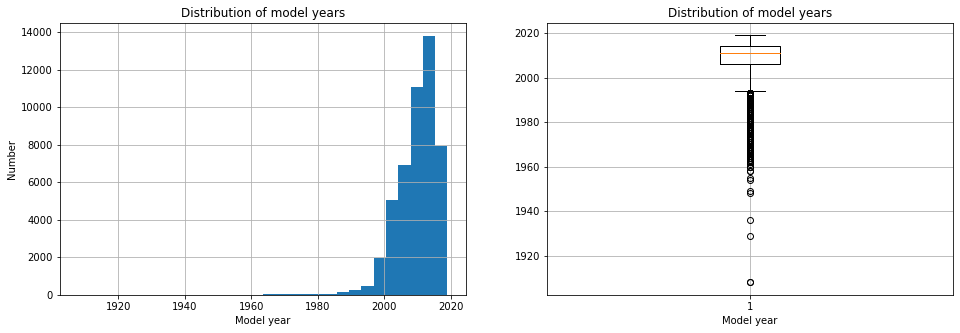

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

ax[0].hist(x = data['model_year'].dropna(), bins=30)
ax[0].grid()
ax[0].set_title('Distribution of model years')
ax[0].set_xlabel('Model year')
ax[0].set_ylabel('Number')

ax[1].boxplot(x = data['model_year'].dropna())
ax[1].grid()
ax[1].set_title('Distribution of model years')
ax[1].set_xlabel('Model year')

plt.show()

Let's take a closer look at the histogram.

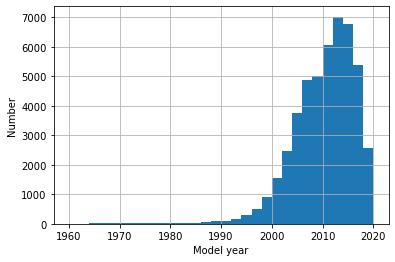

In [20]:
plot_range = (1960, 2020)

plt.hist(data['model_year'].dropna(), bins=30, range=plot_range)
plt.grid()
plt.xlabel('Model year')
plt.ylabel('Number')

plt.show()

*Conclusion*: the data is left-skewed, most models are of 2010-2017 years, as we see from boxplot outliers start at about 1997. For now, we'll fill missing values using median and then check that the distribution didn't change.

In [21]:
data['model_year'] = data['model_year'].fillna(data.groupby(['model'])['model_year'].transform('median'))

In [22]:
data['model_year'].isnull().sum()

0

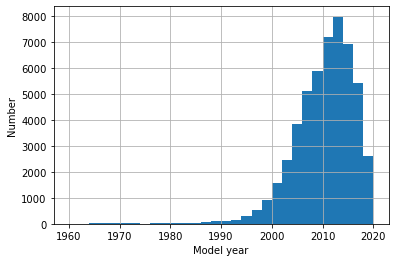

In [23]:
plot_range = (1960, 2020)

plt.hist(data['model_year'], bins=30, range=plot_range)
plt.grid()
plt.xlabel('Model year')
plt.ylabel('Number')

plt.show()

*Conclusion*: the distribution has the same shape. The peak at about 2013 looks higher, but it was expected.

Let's take a look at `cylinders` column, maybe there's a pattern:

In [24]:
data[data['cylinders'].isnull() == 1].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NA,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NA,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
72,3650,2011.0,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,NA,1.0,2018-10-30,3
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,0.0,2019-02-27,93
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NA,1.0,2018-08-31,44


The data also seems to be missing completely  at random, but quite possible that we already have the needed characteristics if the same model from the same year was already featured in the list. Let's check.

In [25]:
data[(data['model_year'] == 2008.0) & (data['model'] == 'honda pilot')].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
4359,6500,2008.0,honda pilot,like new,6.0,gas,130000.0,automatic,SUV,NA,1.0,2018-08-15,44
6665,5500,2008.0,honda pilot,good,6.0,gas,160000.0,automatic,SUV,red,1.0,2019-01-22,94
7396,6995,2008.0,honda pilot,excellent,6.0,gas,134403.0,automatic,SUV,black,1.0,2018-08-01,63
12783,5975,2008.0,honda pilot,good,6.0,gas,181000.0,automatic,SUV,black,1.0,2018-09-14,7


In [26]:
data[(data['model_year'] == 1966.0) & (data['model'] == 'ford mustang')].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
5643,39700,1966.0,ford mustang,excellent,8.0,gas,90211.0,manual,coupe,NA,0.0,2018-10-08,42
14428,12500,1966.0,ford mustang,good,8.0,gas,NaN,manual,coupe,black,0.0,2018-06-05,7
14891,18500,1966.0,ford mustang,like new,NaN,gas,99977.0,automatic,coupe,white,0.0,2018-06-29,104
16768,7900,1966.0,ford mustang,good,6.0,gas,NaN,automatic,coupe,red,0.0,2019-01-22,11


In [27]:
data['cylinders'].value_counts() / len(data) * 100

8.0     30.750121
6.0     30.470645
4.0     26.907327
10.0     1.065502
5.0      0.527899
3.0      0.065987
12.0     0.003882
Name: cylinders, dtype: float64

There it is, though there seem to be slight variations like in the last example. We'll use groupby with mode methods to take the most frequent value.

In [28]:
data['cylinders'] = data.groupby(['model'])['cylinders'].transform(lambda grp: grp.fillna(grp.mode()[0]))

In [29]:
data['cylinders'].isnull().sum()

0

In [30]:
data['cylinders'].value_counts() / len(data) * 100

8.0     34.375546
6.0     33.880640
4.0     30.080543
10.0     1.065502
5.0      0.527899
3.0      0.065987
12.0     0.003882
Name: cylinders, dtype: float64

*Conclusion*: as expected, there's more or less equal rise of percents (about 4%) in the most frequent categories, that's normal.

The last missing value we'll have to treat is `odometer`. We want to use `model_year` to derive a mean or a median. But at first, let's check what this data looks like.

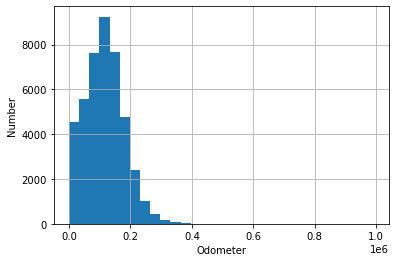

In [31]:
plt.hist(data['odometer'].dropna(), bins=30)
plt.grid()
plt.xlabel('Odometer')
plt.ylabel('Number')

plt.show()

In [32]:
data[data['odometer'] == 0]['condition'].value_counts()

good         104
excellent     69
fair           6
like new       4
salvage        2
Name: condition, dtype: int64

We can see a lot of cases with 0 parameter, which could mean that a car is brand new, or it can be an intentional lie. Then we've checked the `condition` parameter and there's a whole variety of values. That implies that odometer parameter was intentionally written as 0 to heighten the price. As it was done intentionally to play with the price we think that it is better to leave it as it is, as it is our interest to find out how this factor influences the price. The highest peak is at about 100000-130000km. The data is right-skewed, we know there's a 900000 value, but can't even see it, must be a very rare case. Let's take a closer look.

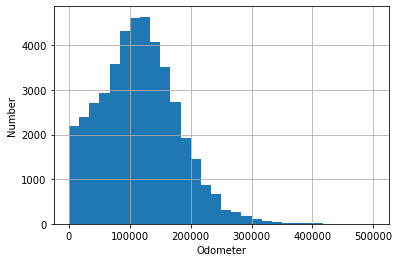

In [33]:
plot_range = (0, 500000)

plt.hist(data['odometer'].dropna(), range = plot_range, bins=30)
plt.grid()
plt.xlabel('Odometer')
plt.ylabel('Number')

plt.show()

Overall it looks like cases thin out already after 300000-320000, meaning greater values are outliers. It is better to use the median. To be safer we'll create a new variable as this parameter supposedly has significant influence on the price.

In [34]:
data['odometer_clean'] = data['odometer'].fillna(data.groupby(['model_year'])['odometer'].transform('median'))

In [35]:
data['odometer_clean'].isnull().sum()

1

There's one missing value that wasn't filled. We know there are outliers in `model_year`, probably that's the only car from that year. We'll check that, and if that's the case we can drop it.

In [36]:
data[data['odometer_clean'].isnull() == 1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,NaN


In [37]:
len(data[data['model_year'] == 1929.0])

1

In [38]:
data = data[data['odometer_clean'].notna()]

In [39]:
data['odometer_clean'].isnull().sum()

0

Now let's check that the distribution didn't change:

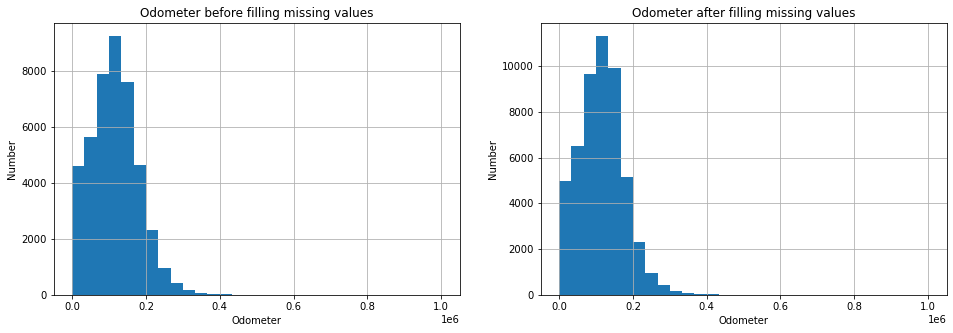

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_range = (0, 1000000)

ax[0].hist(x = data['odometer'].dropna(), range = plot_range, bins = 30)
ax[0].grid()
ax[0].set_title('Odometer before filling missing values')
ax[0].set_xlabel('Odometer')
ax[0].set_ylabel('Number')

ax[1].hist(x = data['odometer_clean'], range = plot_range, bins = 30)
ax[1].grid()
ax[1].set_title('Odometer after filling missing values')
ax[1].set_xlabel('Odometer')
ax[1].set_ylabel('Number')

plt.show()

We've checked that the data distribution remained the same. Although the peak looks higher right now, it was expected.

#### Conclusion

At this part we've treated 5 columns that had missing values:
 - `model_year` was filled using median derived from grouping by model as sufficient means for skewed ordinal categorical data.
 - for `cylinders` as another categorical data we've used mode, also derived from grouping by model to fill in the missing data.
 - `odometer`, a quantitative variable, was treated by median derived from `model_year`. One missing value remained as it was a row with a single instance of a certain year, we've dropped it.
 - `paint_color` is a categorical value that is hard to predict, as it can also be custom-made and comes in several colors per model. We've left it as 'NA' category.
 - lastly, `is_4wd` was treated as Boolean with False(0) missing.

<a id="replacement"></a>
### Data type replacement

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           51524 non-null  int64  
 1   model_year      51524 non-null  float64
 2   model           51524 non-null  object 
 3   condition       51524 non-null  object 
 4   cylinders       51524 non-null  float64
 5   fuel            51524 non-null  object 
 6   odometer        43633 non-null  float64
 7   transmission    51524 non-null  object 
 8   type            51524 non-null  object 
 9   paint_color     51524 non-null  object 
 10  is_4wd          51524 non-null  float64
 11  date_posted     51524 non-null  object 
 12  days_listed     51524 non-null  int64  
 13  odometer_clean  51524 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.9+ MB


In [42]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NA,1.0,2018-06-23,19,145000.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,88705.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,110000.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NA,0.0,2019-03-22,9,161397.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,80903.0


At first, we'll change several variables to integer for better memory performance. The variables will be changed as follows:
<br>`price`: int64 -> int32
<br>`model_year`: float64 -> int16
<br>`is_4wd`: float64 -> Boolean
<br>`days_listed`: int64 -> int 16
<br>`cylinders`: float64 -> int16
<br>`date_posted`: will be converted to Datetime object

In [43]:
try:
    data['price'] = pd.to_numeric(data['price']).astype('int32')
except:
    print('invalid data types')

In [44]:
try:
    data['model_year'] = pd.to_numeric(data['model_year']).astype('int16')
except:
    print('invalid data types')

In [45]:
try:
    data['days_listed'] = pd.to_numeric(data['days_listed']).astype('int16')
except:
    print('invalid data types')

In [46]:
try:
    data['cylinders'] = pd.to_numeric(data['cylinders']).astype('int16')
except:
    print('invalid data types')

In [47]:
try:
    data['is_4wd'] = data['is_4wd'].astype('bool')
except:
    print('invalid data types')

In [48]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51524 non-null  int32         
 1   model_year      51524 non-null  int16         
 2   model           51524 non-null  object        
 3   condition       51524 non-null  object        
 4   cylinders       51524 non-null  int16         
 5   fuel            51524 non-null  object        
 6   odometer        43633 non-null  float64       
 7   transmission    51524 non-null  object        
 8   type            51524 non-null  object        
 9   paint_color     51524 non-null  object        
 10  is_4wd          51524 non-null  bool          
 11  date_posted     51524 non-null  datetime64[ns]
 12  days_listed     51524 non-null  int16         
 13  odometer_clean  51524 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int16(3), i

#### Conclusion

We've changed the data types of several columns for better memory performance and it reduced from 5.5+ to 4.1+ Mb. Next, we've turned the date column to `Datetime` object which will make it easier later to work with it. 

### Duplicates

In [50]:
data.duplicated().sum()

0

*Conclusion:* Duplicates weren't found.

<a id="conclusion2"></a>
### Conclusion

We've performed various preparations for the data analysis:

1) We've treated missing values of 5 columns:
 - `model_year` by median derived from grouping by `model`
 - `cylinders` by mode derived from grouping by `model`
 - `odometer` by median derived from grouping by `model_year`
 - `paint_color` was filled with "NA"
 - `is_4wd` was filled with 0(False) as a Boolean variable
<br>In the process we've checked distributions before and after, and took data type into account.

2) We've changed data types for several columns:
 - `price`
 - `model_year`
 - `is_4wd`
 - `days_listed`
 - `cylinders`
 - `date_posted`
<br>In the result of these changes we've reduced size of a file, bettering memory performance, and converted date-column to dateTime format.

Duplicates were not found.

<a id="calculations"></a>
## Calculations

Next, we'll create id column for `condition`, and replace string values with a numeric scale:

- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [51]:
data['condition'].value_counts()

excellent    24773
good         20144
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In the next function we'll use `NA` for possible nans and `Unknown` for unpredictable cases as an error handling.

In [52]:
def assign_id_condition(i):
    if pd.isna(i):
        return 'NA'
    elif i == 'new':
        return 5
    elif i == 'like new':
        return 4
    elif i == 'excellent':
        return 3
    elif i == 'good':
        return 2
    elif i == 'fair':
        return 1
    elif i == 'salvage':
        return 0
    else:
        return 'unknown'

In [53]:
data['condition_id'] = data['condition'].apply(assign_id_condition)

In [54]:
data['condition_id'].value_counts()

3    24773
2    20144
4     4742
1     1607
5      143
0      115
Name: condition_id, dtype: int64

*Conclusion*: destribution is the same.

Now we'll create separate columns for day of the week, month, and year the ad was placed:

In [55]:
data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year

In [56]:
data['month_posted'] = pd.DatetimeIndex(data['date_posted']).month

In [57]:
data['weekday_posted'] = pd.DatetimeIndex(data['date_posted']).weekday

In [58]:
listed_time = ['year_posted', 'month_posted', 'weekday_posted']

for name in listed_time:
    print(name,'\n{}'.format(data[name].value_counts().sort_index()))
    print('--------------------------------------')
    print()

year_posted 
2018    35682
2019    15842
Name: year_posted, dtype: int64
--------------------------------------

month_posted 
1     4452
2     4014
3     4559
4     2817
5     4503
6     4216
7     4471
8     4480
9     4452
10    4643
11    4353
12    4564
Name: month_posted, dtype: int64
--------------------------------------

weekday_posted 
0    7339
1    7295
2    7299
3    7510
4    7334
5    7392
6    7355
Name: weekday_posted, dtype: int64
--------------------------------------



*Conclusion*: Interesting enough is that all our advertisements come from the 2018-2019 years, and there are twice more in the former than the latter. The least amount of ads was posted in April. All days of the week also seem to be evenly popular for posting ads with Thursday as a leader.

Now let's make weekdays easier to read in case we need them later.

In [59]:
def assign_weekday(i):
    if i is np.nan:
        return "NA"
    elif i == 0:
        return "Monday"
    elif i == 1:
        return "Tuesday"
    elif i == 2:
        return "Wednesday"
    elif i == 3:
        return "Thursday"
    elif i == 4:
        return "Friday"
    elif i == 5:
        return "Saturday"
    elif i == 6:
        return "Sunday"
    else:
        return "Error"

In [60]:
data['weekday_posted'] = data['weekday_posted'].apply(assign_weekday)

In [61]:
data['weekday_posted'].value_counts()

Thursday     7510
Saturday     7392
Sunday       7355
Monday       7339
Friday       7334
Wednesday    7299
Tuesday      7295
Name: weekday_posted, dtype: int64

Next, let's calculate vehicle's age in years. Taking into account current year we'll add 1 to the equation:

In [62]:
data['car_age'] = data['year_posted'] - data['model_year'] + 1

In [63]:
data['car_age'].describe()

count    51524.000000
mean         9.512344
std          6.102743
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64

The vehicle's average mileage per year:

In [64]:
def assign_av_mileage(data):
    odometer = data['odometer_clean']
    years = data['car_age']
    
    if years != 0:
        return odometer / years
    else:
        return odometer

In [65]:
data['av_mileage'] = data.apply(axis=1, func=assign_av_mileage)

In [66]:
data['av_mileage'].isnull().sum()

0

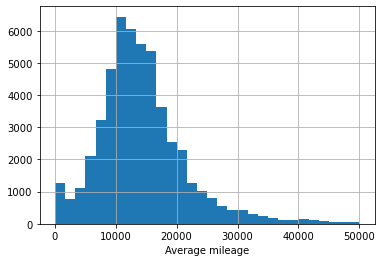

In [67]:
plot_range = (0, 50000)

plt.hist(data['av_mileage'], range=plot_range, bins=30)
plt.grid()
plt.xlabel('Average mileage')

plt.show()

<a id="conclusion3"></a>
### Conclusion:
- We've created an id column for condition as it will give us an opportunity to use more tools for analyzing it as categorical ordinal data.
- Then we've created separate columns for the year, month and weekday the ad was posted. We've turned numeric values of weekday to string alternatives (0 for Monday, 1 for Tuesday, etc).
- After that, we calculated vehicle's age by subtracting the year of the model from the year the ad was posted.
- Finally, we calculated vehicle's average mileage per year by dividing the odometer value by vehicle's age.

<a id="eda"></a>
## Exploratory data analysis

<a id="univariate"></a>
### Univariate analysis

At first, let's study our main parameters: `price`, `car_age`, `av_mileage`, `cylinders`, `condition`.

<b>Price</b>
<br>We'll look at `price` separately, taking into account that we've seen min value of 1 and huge std.

In [68]:
data['price'].describe()

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

There's a notable difference between the mean and the median, the mean being influenced by outliers.

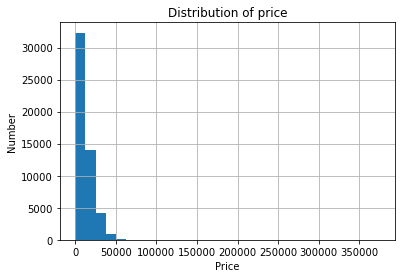

In [69]:
fix, ax = plt.subplots()

ax.hist(x = data['price'], bins=30)
ax.grid()
ax.set_title('Distribution of price')
ax.set_xlabel('Price')
ax.set_ylabel('Number')

plt.show()

It's hard to see anything on this histogram because of the outliers, let's take a closer look.

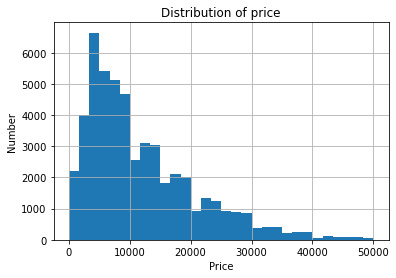

In [70]:
fix, ax = plt.subplots()

plot_range = (0, 50000)

ax.hist(x = data['price'], range=plot_range, bins=30)
ax.grid()
ax.set_title('Distribution of price')
ax.set_xlabel('Price')
ax.set_ylabel('Number')

plt.show()

Now we can see the data and as expected the values closest to 0 seem bizarre. What type of car is sold at this price? Let's check the value of 1.

In [71]:
data[data['price'] == 1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean,condition_id,year_posted,month_posted,weekday_posted,car_age,av_mileage
405,1,2014,chevrolet camaro,excellent,6,gas,71310.0,automatic,coupe,NA,False,2018-07-14,29,71310.0,3,2018,7,Saturday,5,14262.000000
3063,1,1998,chevrolet silverado,good,8,gas,164000.0,automatic,pickup,NA,True,2018-10-11,49,164000.0,2,2018,10,Thursday,21,7809.523810
3808,1,2007,chevrolet tahoe,good,8,gas,200.0,automatic,SUV,red,False,2019-03-18,63,200.0,2,2019,3,Monday,13,15.384615
3902,1,1996,ford f-150,fair,8,gas,163000.0,manual,truck,white,False,2019-02-23,54,163000.0,1,2019,2,Saturday,24,6791.666667
4140,1,2004,chevrolet silverado,excellent,8,diesel,83000.0,automatic,pickup,NA,True,2019-02-04,14,83000.0,3,2019,2,Monday,16,5187.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007,chevrolet trailblazer,excellent,8,gas,NaN,automatic,SUV,black,True,2018-08-06,28,142000.0,3,2018,8,Monday,12,11833.333333
49709,1,2010,ford f150,excellent,8,gas,139700.0,other,pickup,red,True,2019-03-11,18,139700.0,3,2019,3,Monday,10,13970.000000
50245,1,1986,chevrolet silverado,good,8,gas,NaN,automatic,truck,red,True,2018-11-30,50,90420.0,2,2018,11,Friday,33,2740.000000
50393,1,2003,gmc sierra 2500hd,good,8,diesel,212300.0,automatic,pickup,black,True,2019-04-12,28,212300.0,2,2019,4,Friday,17,12488.235294


*Conclusion*: There are 798 cars sold at this price, and there's no pattern. Condition, mileage, models - there's variety in everything, so probably it's not given away for free. This was likely done when the seller wasn't willing to show the price but to bargain directly with the buyer. There's a high chance it's impossible to post an ad without setting the price. But still, we will consider the possibility that this is a bug or an error at the stage of collecting the data. This case is better to be reported to the teammates. Even so, it will be better to treat this case as a group of its own, as it is more of `NA` than an actual price. 

Let's also check whether there are more unbelievable prices like that. Assuming everything less than 400-500 seems unlikely to be a real price, we'll go for 200 to be safe.

In [72]:
data[(data['price'] < 200) & (data['price'] > 1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean,condition_id,year_posted,month_posted,weekday_posted,car_age,av_mileage
844,111,2003,ford mustang,good,8,other,115224.0,manual,coupe,red,False,2018-09-14,24,115224.0,2,2018,9,Friday,16,7201.500000
1572,155,2008,nissan sentra,excellent,4,gas,116806.0,automatic,sedan,red,False,2018-08-26,50,116806.0,3,2018,8,Sunday,11,10618.727273
1573,176,2013,nissan altima,excellent,4,gas,145860.0,automatic,sedan,black,False,2018-05-31,35,145860.0,3,2018,5,Thursday,6,24310.000000
2143,196,2011,chevrolet cruze,excellent,4,gas,134951.0,automatic,sedan,black,False,2018-12-26,61,134951.0,3,2018,12,Wednesday,8,16868.875000
2158,155,2008,nissan sentra,excellent,4,gas,NaN,automatic,sedan,red,False,2018-12-02,60,140000.0,3,2018,12,Sunday,11,12727.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48694,155,2008,nissan sentra,excellent,4,gas,116806.0,automatic,sedan,red,False,2018-10-05,10,116806.0,3,2018,10,Friday,11,10618.727273
48695,176,2010,nissan altima,excellent,4,gas,145860.0,automatic,sedan,black,False,2018-07-17,3,145860.0,3,2018,7,Tuesday,9,16206.666667
48736,196,2011,chevrolet cruze,excellent,4,gas,134951.0,automatic,sedan,NA,False,2018-08-23,10,134951.0,3,2018,8,Thursday,8,16868.875000
50430,5,2011,toyota sienna,good,6,gas,NaN,automatic,SUV,green,False,2018-12-03,5,123025.0,2,2018,12,Monday,8,15378.125000


*Conclusion*: That's 113 more raws, we'll get rid of them together with the value of 1. Now let's take a look at the outliers.

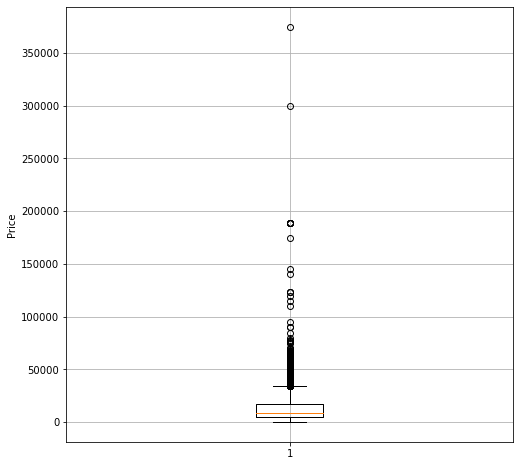

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.boxplot(data['price'])
ax.grid()
ax.set_ylabel('Price')

plt.show()

As we've spotted earlier there are some extreme values, they make this boxplot hard to interpret. Let's take a closer look. We'll set ylim from -100 to see the lower whisker more clearly, and the upper at 50000, right above the upper whisker. We'll use hlines to check whether there's a difference between theoretical and actual values.

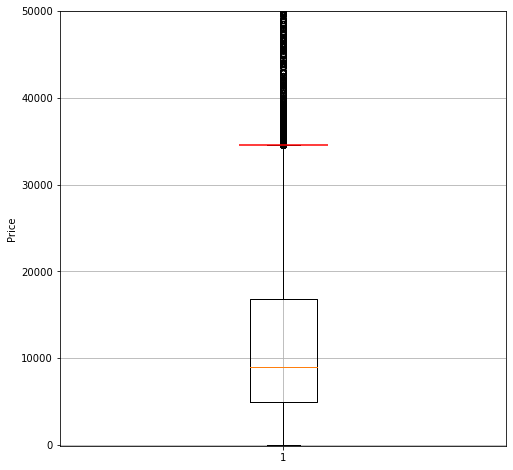

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))

Q1 = np.nanquantile(data['price'], 0.25)
Q3 = np.nanquantile(data['price'], 0.75)
IQR = Q3 - Q1

ax.boxplot(data['price'])
ax.grid()
ax.set_ylim(-100, 50000)
ax.set_ylabel('Price')
ax.hlines(y = (IQR*1.5 + Q3), xmin=0.9, xmax=1.1, color='red')

plt.show()

*Conclusion*: Our median isn't even 10000, meaning that 50% of prices are below 9000, while there are outliers reaching and going beyond 350000. That won't be good for our analysis, it will be better to cut them off. The usual approach will be taking 1.5 * IQR to clean the data from outliers. At first, we'll check how much of it will be cut off if we do that.

In [75]:
len(data[data['price'] > (IQR * 1.5 + Q3)]) / len(data)

0.03202391118701964

3% of data, we can safely remove them. We saw that theoretical value is the same as the Tukey's, so we'll go with 1.5 * IQR for upper limit.

In [76]:
maxprice = IQR * 1.5 + Q3
clean_data = data.query('price >= 200 and price < @maxprice')

Now let's check the boxplot before/after and how the mean changed.

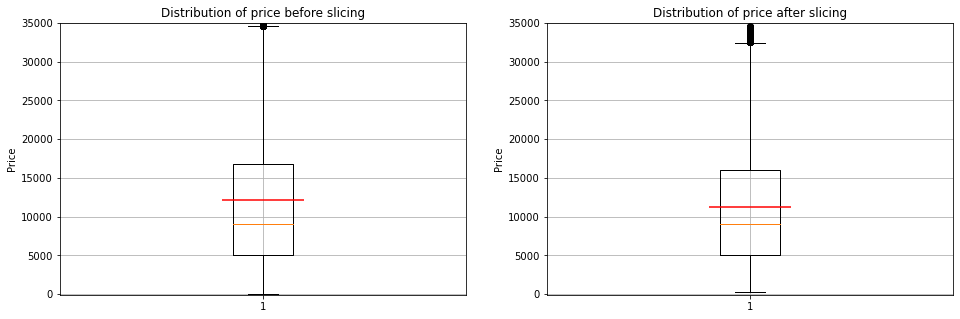

In [77]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

ax[0].boxplot(x = data['price'])
ax[0].grid()
ax[0].set_ylim(-100, 35000)
ax[0].set_title('Distribution of price before slicing')
ax[0].set_ylabel('Price')
ax[0].hlines(y = (np.mean(data['price'])), xmin=0.9, xmax=1.1, color='red')

ax[1].boxplot(x = clean_data['price'])
ax[1].grid()
ax[1].set_ylim(-100, 35000)
ax[1].set_title('Distribution of price after slicing')
ax[1].set_ylabel('Price')
ax[1].hlines(y = (np.mean(clean_data['price'])), xmin=0.9, xmax=1.1, color='red')


plt.show()

In [78]:
np.mean(data['price'])

12132.351040291904

In [79]:
np.mean(clean_data['price'])

11299.673181790331

*Conclusion*: the distribution looks almost the same, only the upper whisker is a bit lower, and the lower whisker is shorter (which is expected). Mean also slightly changed, though as we can see comparing the mean to the median, the median still is a better choice as the measure of central tendency for later research.

<b>Car age, Average mileage, Cylinders and Condition</b>
<br>Let's check other variables.

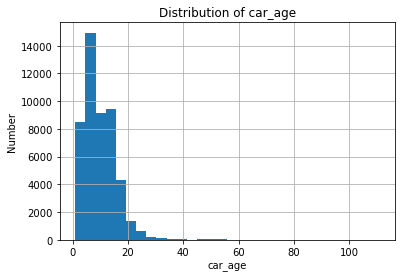

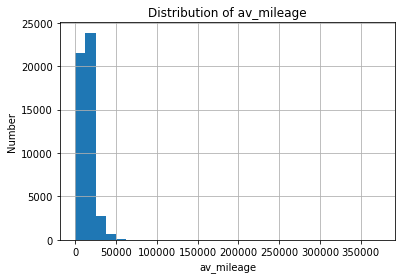

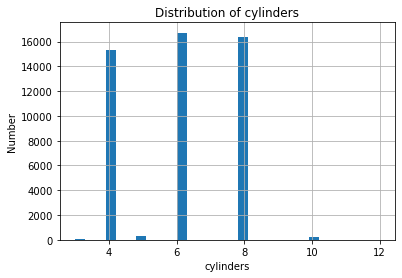

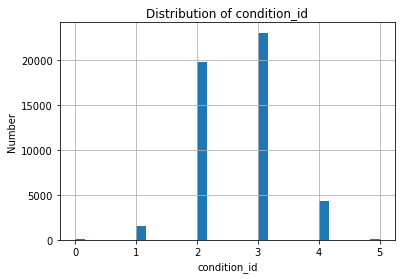

In [80]:
list_for_hist = ['car_age', 'av_mileage', 'cylinders', 'condition_id']

for name in list_for_hist:
    
    fix, ax = plt.subplots()
    
    ax.hist(x = clean_data[name], bins=30)
    ax.grid()
    ax.set_title('Distribution of {}'.format(name))
    ax.set_xlabel(name)
    ax.set_ylabel('Number')

    plt.show()

In [81]:
for name in list_for_hist:
    print(name, "\n{}".format(clean_data[name].describe()))
    print('-----------------------------------')
    print()

car_age 
count    48963.000000
mean         9.785654
std          5.956584
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64
-----------------------------------

av_mileage 
count     48963.000000
mean      14407.748894
std        8379.748274
min           0.000000
25%        9875.000000
50%       13200.000000
75%       17454.545455
max      373200.000000
Name: av_mileage, dtype: float64
-----------------------------------

cylinders 
count    48963.000000
mean         6.057431
std          1.636973
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
-----------------------------------

condition_id 
count    48963.000000
mean         2.613851
std          0.708853
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_id, dtype: float64
-

*Conclusion*:  

- `car_age` is right-skewed with most cars being less than 20 years old, maybe even about 18. The highest peak is likely about 5-7 years old, which tells us that probably after having one car for 5-7 years most people/families decide to change it. There are some visible cases that reach 50 yo, while there are instances of about 100 yo, probably museum or collection models or something similar. The mean and median are very close (mean - 8.7, median - 8.0), meaning those outliers don't influence the statistics too much. Still, it's a bit hard to read this histogram and we'll take a closer look at it.
- `av_mileage` is also right-skewed, getting thinner after the 50000 mark and almost nonexistent at the 100000 mark. It is hard to read where exactly the peak is situated because of outliers, and it is better to look up close at this distribution.
- `cylinders` variable has very small categories of 3, 5, 10 and 12 values. Though it won't be critical to leave them as they are, as the std parameter looks normal, as well as mean and median are almost the same. Also, it's better to check numbers of these categories, if they are underrepresented the results of the analysis based on those categories won't be trustworthy.
- `condition` 5 'new' and 0 'salvage' seem like almost non-existent categories, the N's need to be checked for the same reasons mentioned above.

<b>Vehicle's age</b>

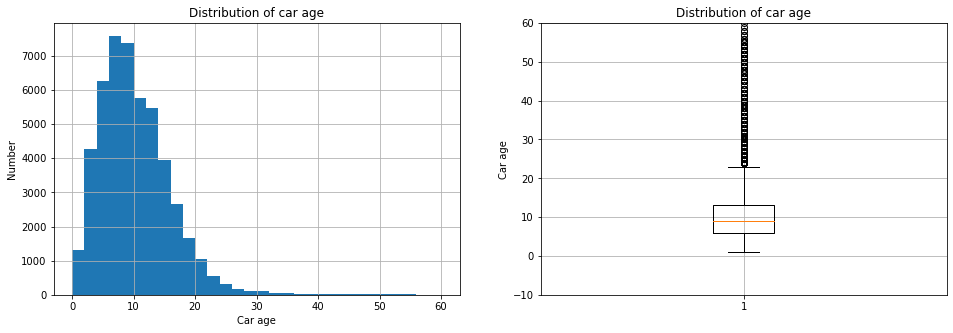

In [82]:
plot_range = (0, 60)
    
fix, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 5))
    
ax[0].hist(x = clean_data['car_age'], range = plot_range, bins=30)
ax[0].grid()
ax[0].set_title('Distribution of car age')
ax[0].set_xlabel('Car age')
ax[0].set_ylabel('Number')

ax[1].boxplot(x = clean_data['car_age'])
ax[1].grid()
ax[1].set_ylim(-10, 60)
ax[1].set_title('Distribution of car age')
ax[1].set_ylabel('Car age')

plt.show()

*Conclusion*: The median lies at 9yo, meaning that 50% of cars are sold before they turn 9yo. The upper whisker stands at 22yo, after this line we can see multiple outliers reaching far beyond 60. It is safe to tell that  by cutting off the data by the upper whisker we won't risk losing too many rows, it is clear from both plots that most of our data lies in between 0 and about 20.

In [83]:
clean_data = clean_data.query('car_age <= 22')

<b> Average mileage</b>

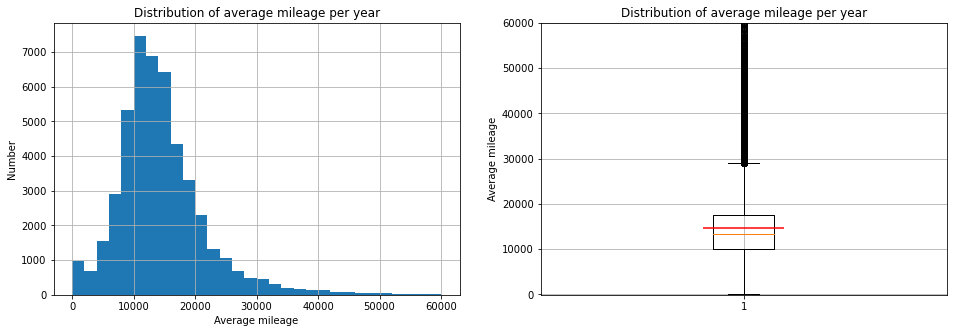

In [84]:
plot_range = (0, 60000)
    
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    
ax[0].hist(x = clean_data['av_mileage'], range = plot_range, bins=30)
ax[0].grid()
ax[0].set_title('Distribution of average mileage per year')
ax[0].set_xlabel('Average mileage')
ax[0].set_ylabel('Number')

ax[1].boxplot(x = clean_data['av_mileage'])
ax[1].grid()
ax[1].set_ylim(-100, 60000)
ax[1].set_title('Distribution of average mileage per year')
ax[1].set_ylabel('Average mileage')
ax[1].hlines(y = (np.mean(clean_data['av_mileage'])), xmin=0.9, xmax=1.1, color='red')

plt.show()

*Conclusion*: The median lies at about 13200 and the highest whisker reaching to 30000, also seeing the mean which has a value of 14407, we can determine that outliers influence our data and it is better to cut them off. Our data has the highest peak at 10-16 hundred, meaning that is our average mileage per year. Still, there's the curious small peak at 0. Let's check how many ads we have with this parameter.

In [85]:
clean_data[clean_data['av_mileage'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean,condition_id,year_posted,month_posted,weekday_posted,car_age,av_mileage
352,7997,2009,gmc yukon,excellent,8,gas,0.0,automatic,SUV,white,True,2019-03-16,88,0.0,3,2019,3,Saturday,11,0.0
814,2995,1999,ford f-150,good,6,gas,0.0,manual,truck,NA,False,2019-03-14,16,0.0,2,2019,3,Thursday,21,0.0
1375,5888,2007,toyota 4runner,good,6,gas,0.0,automatic,SUV,black,False,2019-02-22,36,0.0,2,2019,2,Friday,13,0.0
1970,10988,2000,ford f-250 sd,good,8,diesel,0.0,automatic,truck,white,True,2018-11-21,39,0.0,2,2018,11,Wednesday,19,0.0
2077,11888,2010,chevrolet silverado 1500,good,8,gas,0.0,automatic,truck,white,False,2018-07-02,24,0.0,2,2018,7,Monday,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002,hyundai santa fe,good,6,gas,0.0,automatic,wagon,white,True,2019-04-14,31,0.0,2,2019,4,Sunday,18,0.0
49284,3300,2002,hyundai santa fe,good,6,gas,0.0,automatic,wagon,white,True,2019-02-15,7,0.0,2,2019,2,Friday,18,0.0
50412,25500,2008,jeep wrangler,good,6,gas,0.0,automatic,SUV,yellow,True,2018-06-12,48,0.0,2,2018,6,Tuesday,11,0.0
50631,3600,2012,chrysler 200,good,4,gas,0.0,automatic,sedan,red,False,2018-07-24,90,0.0,2,2018,7,Tuesday,7,0.0


There are only 167 cases. Previously we've found that it can't be a real value, so it is better to cut it off.

Before we decide what will be the upper value for our data, let's check a theoretical value of upper whisker.

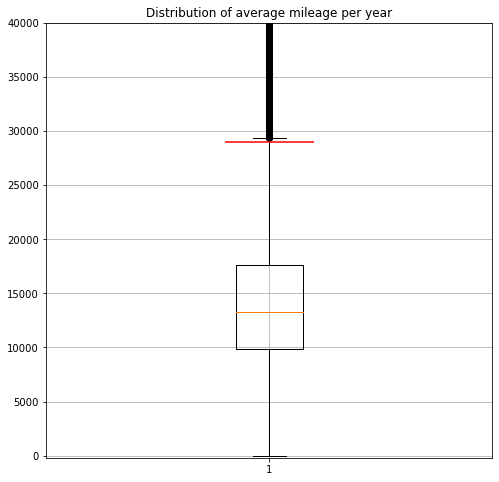

In [86]:
fig, ax = plt.subplots(figsize=(8, 8))

Q1_mile = np.nanquantile(clean_data['av_mileage'], 0.25)
Q3_mile = np.nanquantile(clean_data['av_mileage'], 0.75)
IQR_mile = Q3_mile - Q1_mile

ax.boxplot(data['av_mileage'])
ax.grid()
ax.set_title('Distribution of average mileage per year')
ax.set_ylim(-200, 40000)
ax.hlines(y = (IQR_mile*1.5 + Q3_mile), xmin=0.9, xmax=1.1, color='red')

plt.show()

*Conclusion*: There's a slight difference between the theoretical value and the value we get by Tukey's method, we can see it being a bit lower than the actual one. Tukey's method is usually better for skewed data so we'll go for a value a bit bigger than the theoretical one.

In [87]:
IQR_mile * 1.5 + Q3_mile

28986.64154411765

Theoritical whisker value is 28986, so we'll go for 29000.

In [88]:
clean_data = clean_data.query('av_mileage > 0 and av_mileage < 29000')

In [89]:
len(clean_data) / len(data)

0.8805022901948606

The size of our data is still 88% of the whole dataset, looks fine.

Now let's take a look whether there's a change in dispersion of other variables after we've sliced our data.

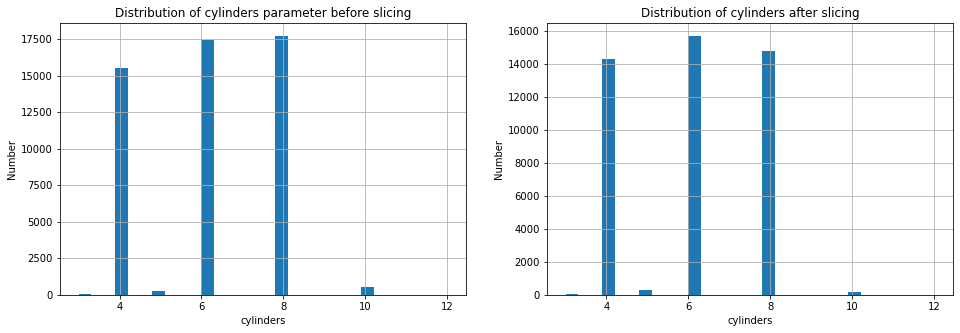

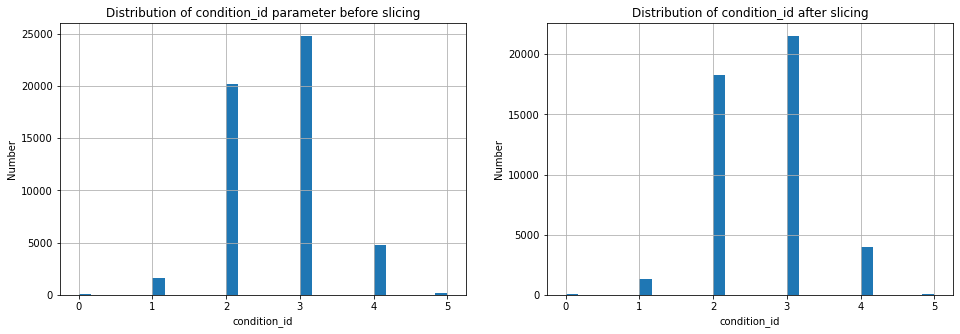

In [90]:
list_for_hist = ['cylinders', 'condition_id']

for name in list_for_hist:
    
    fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    ax[0].hist(x = data[name], bins=30)
    ax[0].grid()
    ax[0].set_title('Distribution of {} parameter before slicing'.format(name))
    ax[0].set_xlabel(name)
    ax[0].set_ylabel('Number')

    ax[1].hist(x = clean_data[name], bins=30)
    ax[1].grid()
    ax[1].set_title('Distribution of {} after slicing'.format(name))
    ax[1].set_xlabel(name)
    ax[1].set_ylabel('Number')

    plt.show()

We also wanted to check quantities of smaller groups in these two columns.

In [91]:
clean_data['cylinders'].value_counts()

6     15716
8     14831
4     14334
5       263
10      191
3        30
12        2
Name: cylinders, dtype: int64

In [92]:
clean_data['condition_id'].value_counts()

3    21523
2    18311
4     4003
1     1348
0       96
5       86
Name: condition_id, dtype: int64

*Conclusion*: 
- `condition_id` looks ok. The smallest amount of ads is for new cars, category id - 5, followed by 'salvage', category id 0, although the numbers are small it is ok to use them for research. The greatest amount of ads are present in 'excellent' category, with id 3, there are 21190 cases present, followed by category 2, 'good' with 18297 cases. Earlier we saw that 50% of cars are being sold before they turn 8yo, with an average mileage of 15000 per year. 8 years is a bit far-fetched to be called 'excellent condition', still, this can be true in some cases while can be a lie in others. 'excellent' can be interpreted differently by different people.
- `cylinders` on the other hand has 30 cars with a value of '3' and only 2 with '12'. These numbers are too small for trustworthy results, but we look at it as if those categories have a right to existence and don't need to be removed - even if they are rare there's nothing bizarre or unlogical in them. We won't be able however to include them in the results of our study. On the other hand, 6 and 8 are the most popular choices for manufacturers in general, this stands true in our research also. Although before slicing the data we had more 8 cylinders than 6, and after it's vice versa, still the numbers are pretty close. The third most popular number of cylinders is 4.

<b> Days the ad was listed</b>
<br>Now let's take a look at `days_listed` parameter.

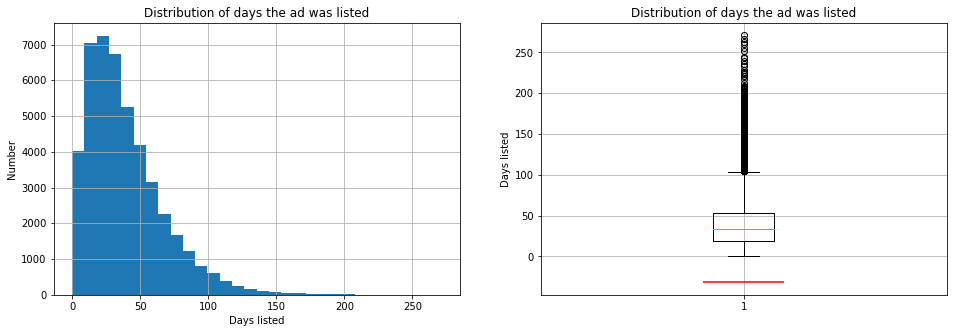

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

Q1_days = np.nanquantile(clean_data['days_listed'], 0.25)
Q3_days = np.nanquantile(clean_data['days_listed'], 0.75)
IQR_days = Q3_days - Q1_days

ax[0].hist(x = clean_data['days_listed'], bins=30)
ax[0].grid()
ax[0].set_title('Distribution of days the ad was listed')
ax[0].set_xlabel('Days listed')
ax[0].set_ylabel('Number')

ax[1].boxplot(x = clean_data['days_listed'])
ax[1].grid()
ax[1].set_title('Distribution of days the ad was listed')
ax[1].set_ylabel('Days listed')
ax[1].hlines(y = (Q1_days - IQR_days*1.5), xmin=0.9, xmax=1.1, color='red')

plt.show()

In [94]:
np.mean(clean_data['days_listed'])

39.569356580774574

In [95]:
np.median(clean_data['days_listed'])

33.0

*Conclusion*: We see that half of the ads were listed for less than 33 days, the data is right-skewed, so we'll use median as the means of central tendency. The ad's average lifetime can be determined as 33 days. We can also see the difference between the theoretical and the Tukey's values for the lower whisker in the boxplot, which means that most of the data is centered in the lower part, while the boxplot's upper whisker is at about 100 days, telling us that more than 100 days is an abnormal lifetime for an ad. There's also a peculiar case of 0 values. Let's see how many there are.

In [96]:
len(clean_data[clean_data['days_listed'] == 0])

47

Only 47 cases, let's take a look at the rows.

In [97]:
clean_data[clean_data['days_listed'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odometer_clean,condition_id,year_posted,month_posted,weekday_posted,car_age,av_mileage
1247,14995,2008,chevrolet silverado 1500,excellent,8,gas,93300.0,automatic,truck,grey,True,2018-05-15,0,93300.0,3,2018,5,Tuesday,11,8481.818182
1983,14000,1999,ford f250,excellent,8,diesel,137500.0,automatic,truck,red,True,2018-09-27,0,137500.0,3,2018,9,Thursday,20,6875.000000
2883,4000,2004,ram 1500,excellent,8,gas,250000.0,automatic,truck,brown,True,2018-08-13,0,250000.0,3,2018,8,Monday,15,16666.666667
4567,5000,2007,toyota corolla,good,4,gas,223000.0,manual,sedan,silver,False,2018-07-11,0,223000.0,2,2018,7,Wednesday,12,18583.333333
4901,12500,2001,ram 1500,good,8,gas,99892.0,automatic,truck,black,True,2018-05-11,0,99892.0,2,2018,5,Friday,18,5549.555556
6114,500,2003,dodge dakota,fair,6,gas,215457.0,automatic,pickup,NA,False,2018-10-31,0,215457.0,1,2018,10,Wednesday,16,13466.062500
6548,4800,2007,honda odyssey,good,6,gas,152400.0,automatic,mini-van,brown,False,2018-09-25,0,152400.0,2,2018,9,Tuesday,12,12700.000000
7036,5900,2007,jeep grand cherokee laredo,excellent,6,gas,NaN,automatic,SUV,grey,True,2018-07-21,0,142000.0,3,2018,7,Saturday,12,11833.333333
9607,4999,2012,nissan sentra,excellent,4,gas,125000.0,automatic,sedan,silver,False,2019-03-26,0,125000.0,3,2019,3,Tuesday,8,15625.000000
9732,15000,2003,ford f-150,good,8,gas,90048.0,automatic,truck,black,False,2018-09-21,0,90048.0,2,2018,9,Friday,16,5628.000000


We still don't know the way `days_listed` was derived, we would have consulted teammates when an opportunity rises. If those are the rare cases when the car was sold the same day the ad aired it's a rare case but plausible. Else this could mean missing values. The number of such cases is very small so it's ok to leave them as they are, we'll go for theory that those sellers were lucky to sell their cars on day 1, and considering that number of such cases is less than 1%, they were definitely very lucky.

<b>Analyzing types of vehicles</b>
<br>Now let's analyze the number of ads and the average price for each type of vehicle. 

In [98]:
clean_data['type'].value_counts()

sedan          11277
SUV            11211
truck          10229
pickup          6010
coupe           1893
wagon           1465
mini-van        1083
hatchback        961
van              525
convertible      315
other            211
offroad          168
bus               19
Name: type, dtype: int64

Before we determined that `price` is better be measured by median, so we'll go for it.

In [99]:
type_to_price_pivot = clean_data.pivot_table(index='type', values='price', aggfunc=['count', 'median'])
type_to_price_pivot.columns = ['Number', 'Average price']

In [100]:
type_to_price_pivot

,Number,Average price
type,,
SUV,11211,8800.0
bus,19,28990.0
convertible,315,13350.0
coupe,1893,14088.0
hatchback,961,5980.0
mini-van,1083,6000.0
offroad,168,12949.5
other,211,8995.0
pickup,6010,13900.0


Bar chart is suitable to show one variable (price) across different conditions (car types in our case). It is also suitable for categorical variables and makes it easier to read, so we'll go for it.

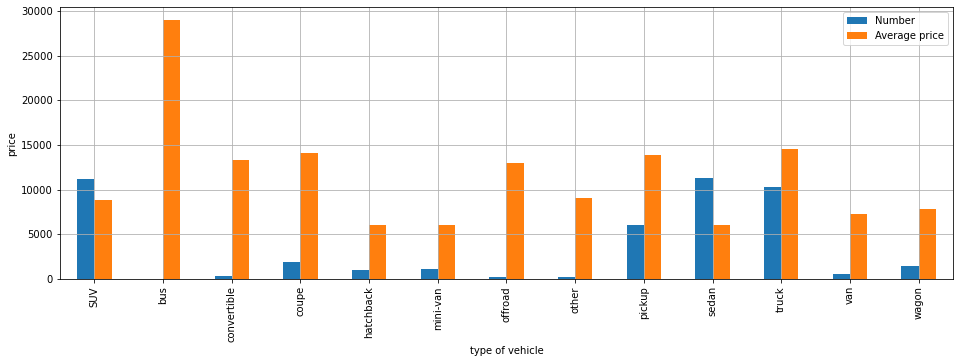

In [101]:
type_to_price_pivot.plot(kind='bar', grid=True, figsize=(16, 5))
plt.xlabel('type of vehicle')
plt.ylabel('price')

plt.show()

*Conclusion*: As we can see from the bar chart the 2 most popular cars are `SUV` with average price 8800 followed closely by `sedan` with average price being 5995. Curious is that `buses` are the most expensive yet can't be analyzed as they are hardly present, being only 19. We'll select `SUV` and `sedan` as two representetives for further research.

<a id="bivariate"></a>
### Bi-variate analysis

<br>Now let's check which factors influence the price of a vehicle on selected examples.

- age
- condition
- mileage
- transmission type
- color

In [102]:
sample = clean_data.query('type == "SUV" or type == "sedan"')[
    ['car_age', 'condition_id', 'odometer_clean', 'transmission', 'paint_color', 'price', 'type']]

At first let's take a look at categorical variables, `paint_color` and `transmission`. We'll use seaborn for plotting boxplot charts.

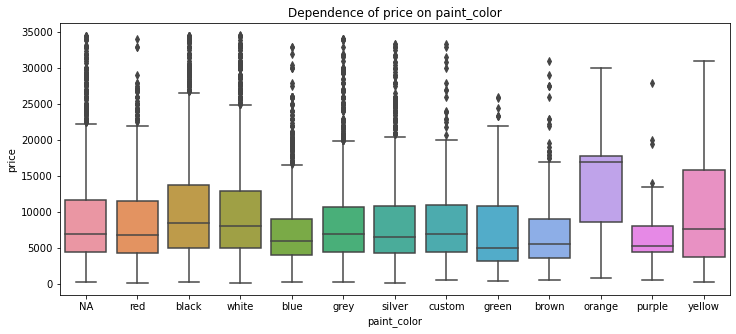

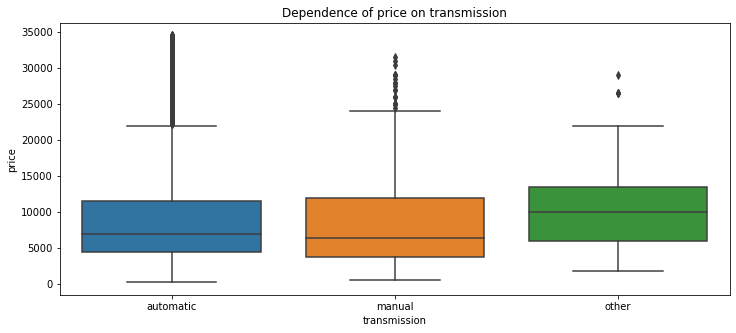

In [103]:
listed_cat = ['paint_color', 'transmission']

for name in listed_cat:
    fig, ax = plt.subplots(figsize=(12, 5))

    sns.boxplot(x=sample[name], y=sample['price'])
    ax.set_title('Dependence of price on {}'.format(name))

Now let's plot remaining variables. We'll plot a curve with dots for `car_age`, `condition_id` and `odometer`, then we'll create scatter plots for all the variables for SUV and sedan to be seen separately.

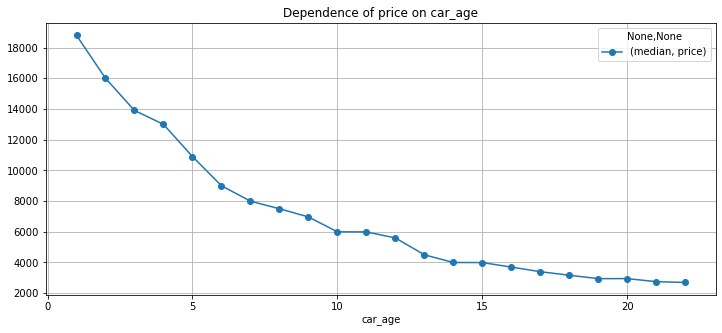

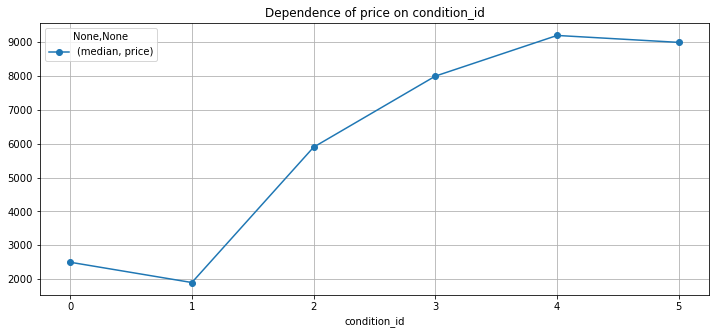

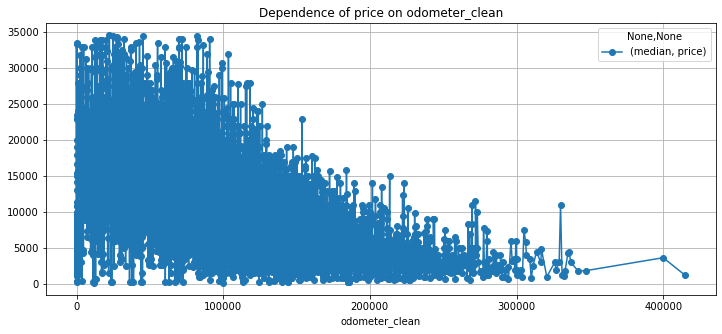

In [104]:
listed = ['car_age', 'condition_id', 'odometer_clean']

for name in listed:
    sample.pivot_table(
        index=name, values='price', aggfunc=['median']).plot(
        style='o-', grid=True, figsize=(12, 5), title='Dependence of price on {}'.format(name)
    )

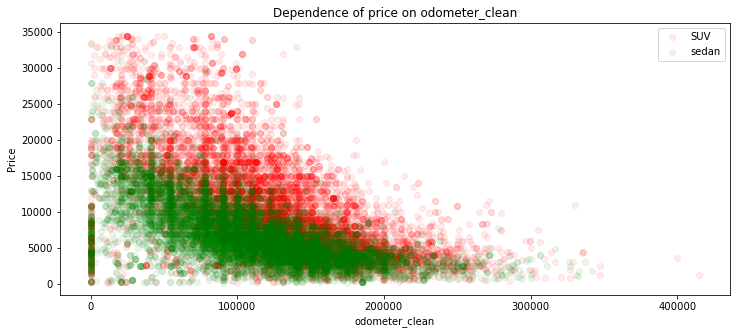

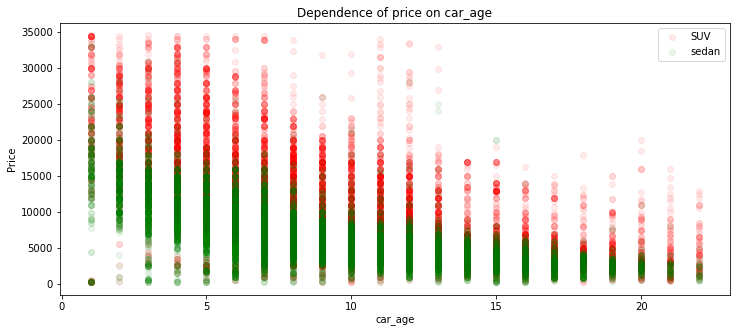

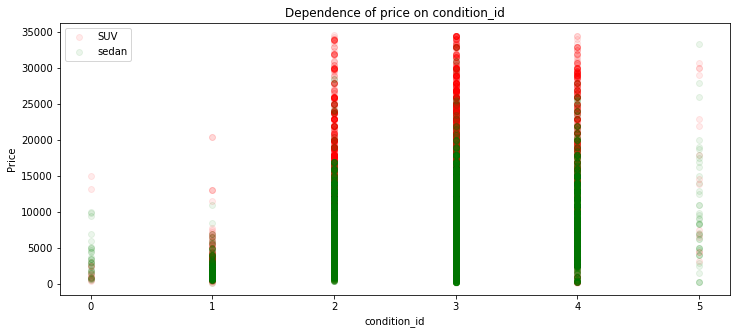

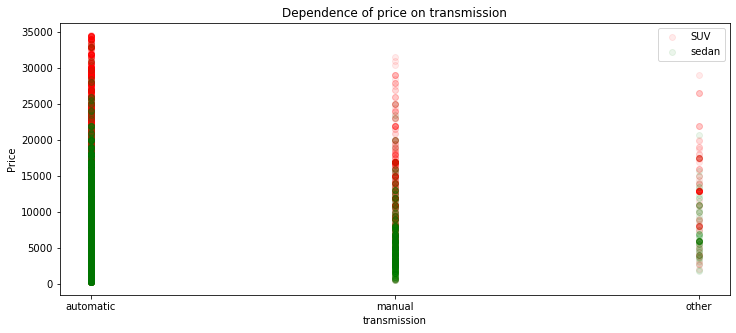

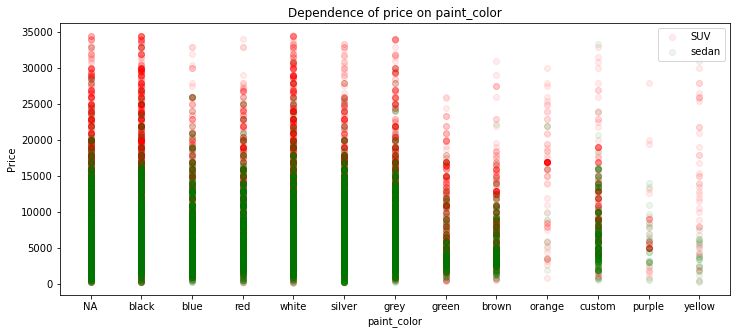

In [105]:
listed_cols = ['odometer_clean', 'car_age', 'condition_id', 'transmission', 'paint_color']

for name in listed_cols:
    fig, ax = plt.subplots(figsize=(12, 5))

    ax.scatter(sample.query('type == "SUV"')[name], sample.query('type == "SUV"')['price'], 
               color='red', label='SUV', alpha=0.08)
    ax.scatter(sample.query('type == "sedan"')[name], sample.query('type == "sedan"')['price'], 
               color='green', label='sedan', alpha=0.08)

    ax.legend()
    
    ax.set_title('Dependence of price on {}'.format(name))
    ax.set_xlabel(name)
    ax.set_ylabel('Price')

    plt.show()

Lastly, we'll create the Pearson correlation matrix.

In [106]:
sample.corr()

,car_age,condition_id,odometer_clean,price
car_age,1.000000,-0.302267,0.653455,-0.572977
condition_id,-0.302267,1.000000,-0.324773,0.273887
odometer_clean,0.653455,-0.324773,1.000000,-0.533876
price,-0.572977,0.273887,-0.533876,1.000000


<a id="conclusion4"></a>
### Conclusion

1) Analyzing the influence of the vehicle's color on its price we can see from the boxplot chart that there's some influence of several colors although it isn't that prominent. Definitely orange color stands out the most, though from the scatter plot we can see that it is also not great in number, and mostly present in SUV. Probably the color itself is rare and is considered a special feature of a car. White and black colors also stand out, but they are also the most widespread, so it is expected that they have variety in prices. Those two colors are classic. We need to note yellow color, which has the biggest variety in prices, and again this color is more present in SUVs than in sedans, and is quite rare overall.

2) Analyzing transmission's influence on price we have to note that from scatter plot the automatic transmission is the most popular choice and is a bit more expensive than manual judging by its median, though the difference isn't that big. There is 'other' category that is the most expensive of the three of them, though it is also the smallest in number.

3) From both plots, we can clearly see that age strongly influences the price in both types. The curve goes from 1 (car being sold the same year it was bought), where the prices are the highest, and slowly gets down, the older car gets. It seems logical and was expected. The Pearson correlation coefficient confirms a negative correlation, meaning that while one is rising(age), the other is getting smaller(price).

4) There's also the expected influence of the price on car's condition. 0 and 5 values have the smallest numbers and seem a bit off the general curve that lies between 1 and 4, though only slightly. Both curve and scatterplot show us that price is smallest from the worst conditions, 'salvage' and 'fair', and then stably rises to be highest at "like new" condition, getting slightly lower at 'new'. The Pearson correlation coefficient shows some small positive correlation, being small probably because of the 2 categories we can not include in our analysis, which makes the correlation non-linear.

5) While analyzing mileage, we notice some strange occurrence of low prices for close to 0(or 0) values of odometer. Earlier we've mentioned that this hardly can be the truth, probably an intentional lie or some missing values, so we'll leave this case alone. Correlation matrix as well as the scatterplot show us some explicit negative correlation, meaning the bigger the value of odometer, the smaller the price.

<a id="conclusion5"></a>
## Overall conclusion

We've completed the analysis of ads posted on our website from 2018 to 2019 years with the goal to determine which factors influence the price of a vehicle the most. The ads were equally posted on all weekdays, and all months, except for fewer numbers in April.

The typical lifetime of an ad on our website is 33 days. The ad can be considered extremely short-lived to be removed on the same day it was posted, as there are very few cases like that. And extremely long lifetime will be more than 100 days.

*General information*:
Half of the ads define prices less than 9000, 9000 being the average price on our website. Everything beyond 35000 can be considered extremely high price and is a rare case. Most of the cars are being sold before they reach 10 yo, the average being 9, which tells us that this is the average time car is being used before the owner decides to change it. The average mileage is 13141 per year, and everything beyond 30000 is abnormally high. The most widespread car condition is 'excellent', which together with average age, can tell us something about the subjectivity of this parameter. Most popular colors are white and black, and most engines have 6 or 8 cylinders.

*Note*: It is important to note that there were some bizarre cases of price being 1 and odometer being 0 which is better be checked with the team whether this is some kind of error or an attempt to hide the truth from the buyer. Those values were not included in the analysis.

The analysis was performed on the basis of the two most widespread types of cars in ads: SUV with average price being 8800 and sedan with average price being 5995. We've found that the most influencing factors are car's age, condition and mileage, which are basic technical characteristics. Vehicle's age and mileage have average negative correlation, and can be used to some extent for price prediction. Among all the transmission types 'other' category tends to be the most expensive. Although color of the car has some influence, those are mostly special cases, or rare colors like orange and yellow, which are mostly presented in SUV. 

*Recommendations for business*:

When building a prediction model the following factors should be considered a high priority:

- Vehicle's age: the older the car, the smaller the price. Half of the cars are sold before they turn 9 yo.
- Vehicle's condition: the better the condition, the higher the price. Most cars sold on the website are described as 'excellent'.
- Vehicle's mileage: the bigger the odometer value, the smaller the price. Note, there are cases where odometer value is written to be 0, which seems unreliable, our advice is to check this issue.
- A vehicle's transmission type being other than automatic or manual tends to be the most expensive.